In [2]:
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import joblib
import statistics

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
digits = datasets.load_digits()

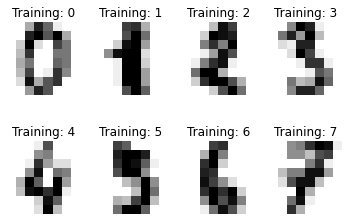

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [5]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [6]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
# Don't cheat - fit only on training data
scaler = joblib.load('digits_scaler.pkl')
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [28]:
net = joblib.load('digits_net.pkl')

In [29]:
score = 0
vec = []
for i in range(100):
    X, y = data, digits.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    vec.append(net.score(X_test, y_test)*100)
score = sum(vec) / 100
print("-----------------------")    
print('Score: %.2f' % score)
print("-----------------------")
print('Desviación tipica: %.2f' % statistics.stdev(vec))

-----------------------
Score: 98.12
-----------------------
Desviación tipica: 0.38


In [30]:
net.n_iter_

694

In [31]:
expected = y_test
predicted = net.predict(X_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       0.95      1.00      0.98        63
           2       1.00      0.98      0.99        82
           3       1.00      0.98      0.99        61
           4       0.99      1.00      0.99        67
           5       1.00      1.00      1.00        72
           6       0.98      1.00      0.99        65
           7       1.00      0.98      0.99        82
           8       1.00      0.96      0.98        72
           9       0.96      1.00      0.98        81

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



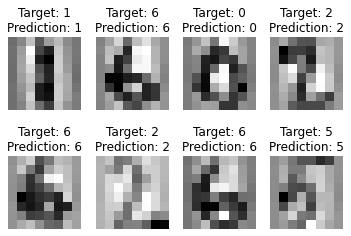

In [32]:
images_and_predictions = list(zip(X_test, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Target: %i\nPrediction: %i' % (y_test[index],prediction))

In [33]:
joblib.dump(scaler, 'digits_scaler_Boix_Gil.pkl') 
joblib.dump(net, 'digits_net_Boix_Gil.pkl')

['digits_net_Boix_Gil.pkl']